# About The Data

Once the seeds are sown, farmer works days and nights to make sure that he cultivates a good harvest at the end of season. A good harvest is ensured by several factors such as availability of water, soil fertility, protecting crops from rodents, timely use of pesticides & other useful chemicals and nature. While a lot of these factors are difficult to control for, the amount and frequency of pesticides is something the farmer can control.

Pesticides are also special, because while they protect the crop with the right dosage. But, if you add more than required, they may spoil the entire harvest. A high level of pesticide can deem the crop dead / unsuitable for consumption among many outcomes. This data is based on crops harvested by various farmers at the end of harvest season. To simplify the problem, you can assume that all other factors like variations in farming techniques have been controlled for.

# Data Description

1. ID = Unique ID
2. Estimated_Insects_Count = Estimated Insects Count per square mtrs
3. Crop_Type = Category of crop (0 or 1)
4. Soil_Type = Category of soil (0 or 1)
5. Pesticide_Use_Category = Category of pesticide uses (0 = Never or 1 = Previously Used or 3 = Currently Using)
6. Number_Doses_Week = No of doses per week
7. Number_Weeks_Used = No of weeks used
8. Number_Weeks_Quit = No of weeks quit
9. Season = Season Category (1,2,3)
10. Crop_Damage (Target Variable)= Crop Damage Category (0 = Alive or 1 = Damage due to other causes or 2 = Damage due to pesticide)

# Importing Essential Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:\\Users\\DELL\Downloads\\train_agriculture.csv")
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [3]:
df.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [4]:
df.shape

(4599, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


Observations:

1. Apart from the ID column we have have all the columns that are numerical in nature. So, we will either the encoding it or removing it according to observations we will be making when we proceed in the project.
2. We have no missing data in columns apart from the Number_Weeks_Used in the dataset.

In [6]:
#We will be filling null values by mean.
df["Number_Weeks_Used"].fillna(df["Number_Weeks_Used"].mean(),inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4599 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


Now our data is complete.

In [8]:
df.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [9]:
df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.891027,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,11.965785,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.891027,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


1. Mean and 50% apart from category type of columns is fine.
2. Standard Deviation is quite high in columns Estimated_Insects_Count, Number_Doses_Week, Number_Weeks_Used, Number_Weeks_Quit
3. Number of Estimated Insects Count ranges between 150-4100 per sq mtrs.
4. Number_Weeks_Used ranges between 0-66.
5. Number_Weeks_Quit ranges between 0-47.

In [10]:
df['ID'].value_counts()

F00004546    1
F00002387    1
F00003633    1
F00005547    1
F00001260    1
            ..
F00005739    1
F00008019    1
F00004473    1
F00004803    1
F00000965    1
Name: ID, Length: 4599, dtype: int64

As we can notice every ID is unique in nature. So we will be removing this column from the dataset as it will not be helping us in the analysis. 

In [11]:
df.drop(['ID'],axis=1,inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Estimated_Insects_Count  4599 non-null   int64  
 1   Crop_Type                4599 non-null   int64  
 2   Soil_Type                4599 non-null   int64  
 3   Pesticide_Use_Category   4599 non-null   int64  
 4   Number_Doses_Week        4599 non-null   int64  
 5   Number_Weeks_Used        4599 non-null   float64
 6   Number_Weeks_Quit        4599 non-null   int64  
 7   Season                   4599 non-null   int64  
 8   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 323.5 KB


All the data is numerical in nature now.

In [13]:
df['Crop_Type'].value_counts()

0    3565
1    1034
Name: Crop_Type, dtype: int64

In [14]:
df['Soil_Type'].value_counts()

0    2407
1    2192
Name: Soil_Type, dtype: int64

In [15]:
df['Pesticide_Use_Category'].value_counts()

2    3205
3    1349
1      45
Name: Pesticide_Use_Category, dtype: int64

In [16]:
df['Season'].value_counts()

2    2327
1    1379
3     893
Name: Season, dtype: int64

In [17]:
df['Crop_Damage'].value_counts()

0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64

# EXPLORATORY DATA ANALYSIS

# Univariate Analysis

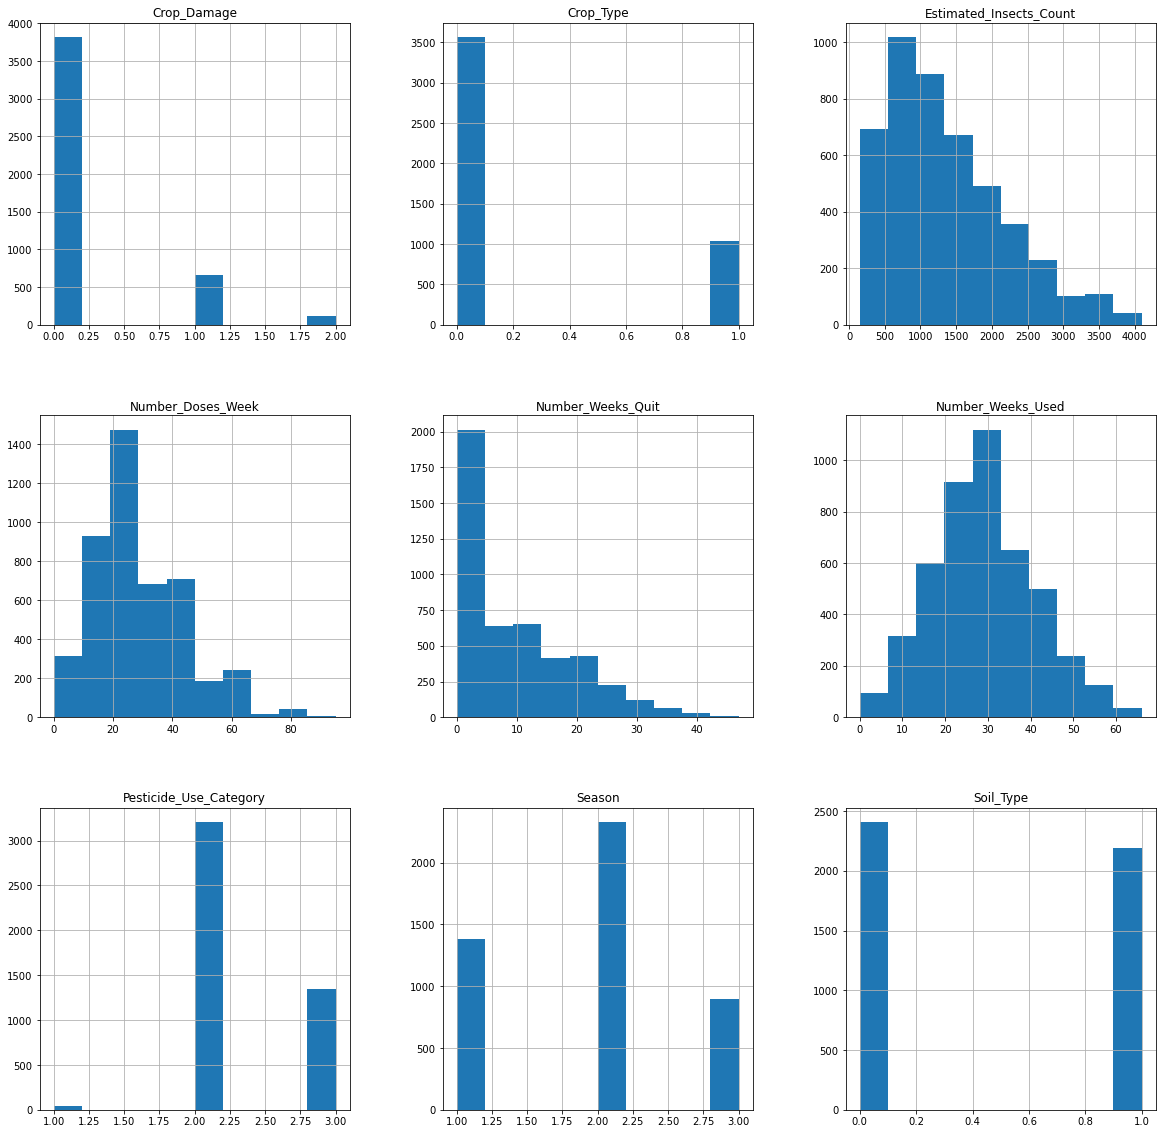

In [18]:
df.hist(figsize=(20,20))
plt.show()

1. We can notice that for variables like Estimated_Insects_Count, Number_Doses_Week, Number_Weeks_Quit the graph is rightly-skewed.
2.  Whereas the Number_Weeks_Used variable's graph looks normally distributed.

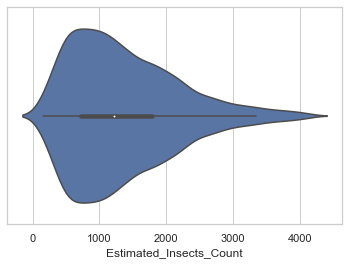

In [19]:
sns.set(style="whitegrid")
sns.violinplot(df["Estimated_Insects_Count"])
plt.show()

In most cases the insect count per sq mtrs ranges between 500-1500.

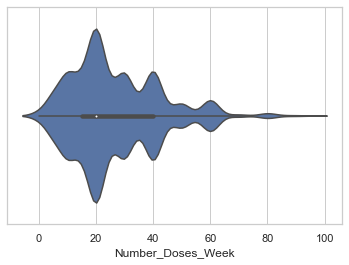

In [20]:
sns.set(style="whitegrid")
sns.violinplot(df["Number_Doses_Week"])
plt.show()

In most cases the insect count per sq mtrs ranges between 10-40.

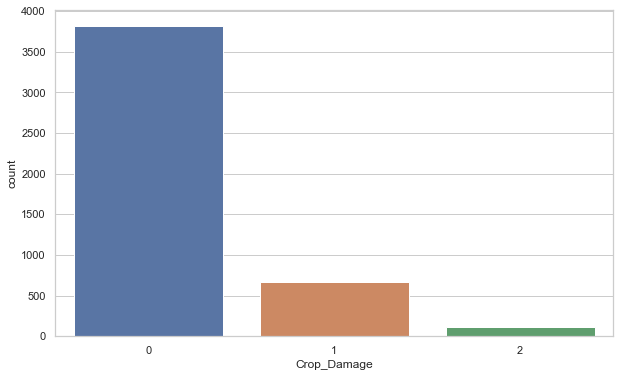

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(df["Crop_Damage"])
plt.show()

This shows that most of the crops are alive and the crop damage is done by reasons other than pesticide.  

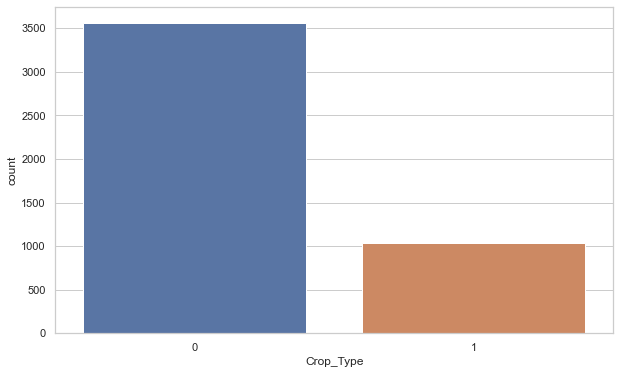

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(df["Crop_Type"])
plt.show()

Type 0 of crop accounts for most obervations present in dataset.

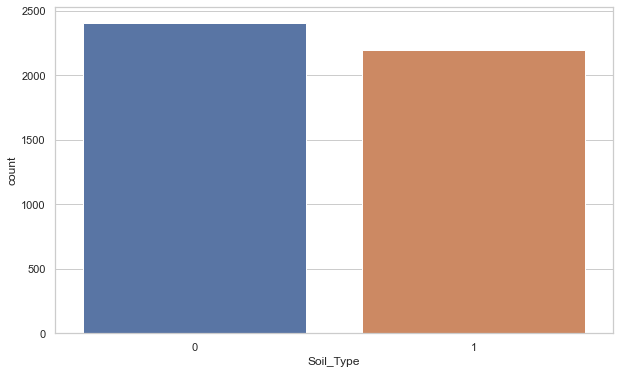

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(df["Soil_Type"])
plt.show()

Observations present in dataset are evenly poised between soil 0 and 1.

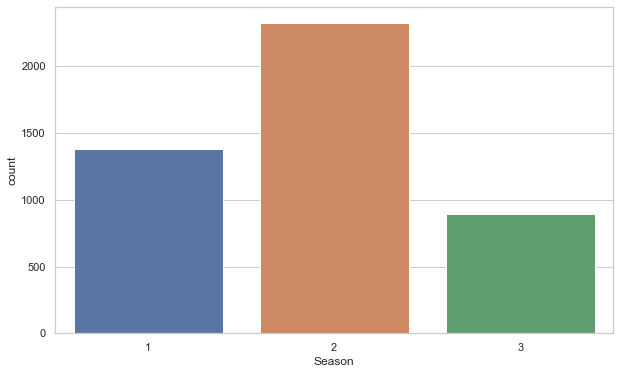

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(df["Season"])
plt.show()

Most of the observations are from season 2 followed by season 1 and season 2.

# Bi-Variate Analysis

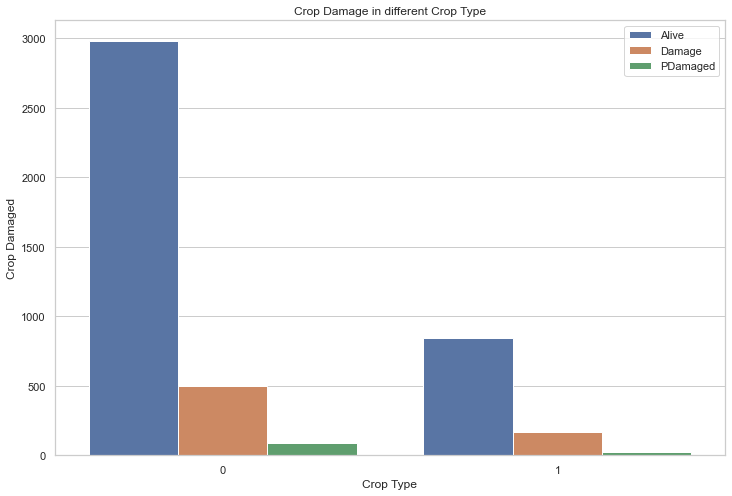

In [25]:
#Crop Type vs Crop Damage Type 
plt.subplots(figsize=(12,8))
sns.countplot(x='Crop_Type',hue='Crop_Damage',data=df)
plt.title("Crop Damage in different Crop Type")
plt.xlabel("Crop Type")
plt.ylabel("Crop Damaged")
plt.legend(["Alive","Damage","PDamaged"]);
plt.xticks(rotation=0);

We can see most damaged crops are of crop type 0.

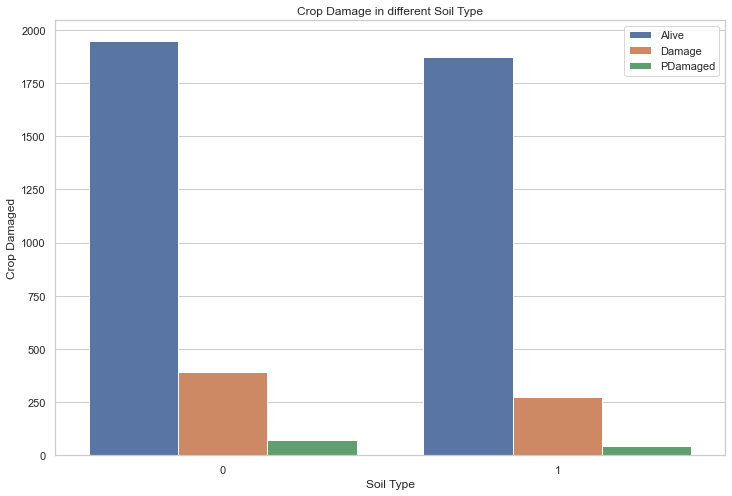

In [26]:
#Soil Type vs Crop Damage Type 
plt.subplots(figsize=(12,8))
sns.countplot(x='Soil_Type',hue='Crop_Damage',data=df)
plt.title("Crop Damage in different Soil Type")
plt.xlabel("Soil Type")
plt.ylabel("Crop Damaged")
plt.legend(["Alive","Damage","PDamaged"]);
plt.xticks(rotation=0);

We can see most damaged crops are of Soil type 0.

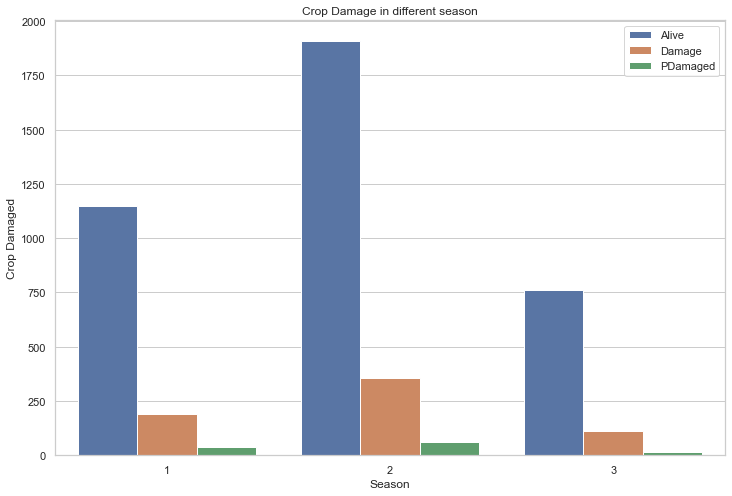

In [27]:
#Season vs Crop Damage Type 
plt.subplots(figsize=(12,8))
sns.countplot(x='Season',hue='Crop_Damage',data=df)
plt.title("Crop Damage in different season")
plt.xlabel("Season")
plt.ylabel("Crop Damaged")
plt.legend(["Alive","Damage","PDamaged"]);
plt.xticks(rotation=0);

Most of the crops were damaged in Season 2.

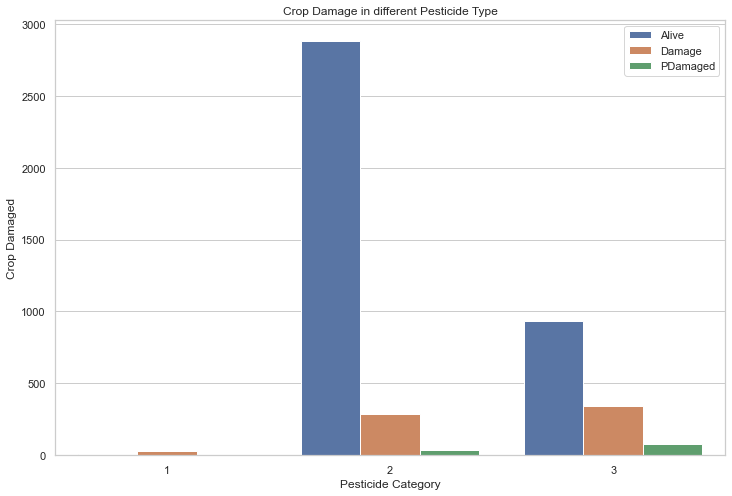

In [28]:
#Pesticide category vs Crop Damage Type 
plt.subplots(figsize=(12,8))
sns.countplot(x='Pesticide_Use_Category',hue='Crop_Damage',data=df)
plt.title("Crop Damage in different Pesticide Type")
plt.xlabel("Pesticide Category")
plt.ylabel("Crop Damaged")
plt.legend(["Alive","Damage","PDamaged"]);
plt.xticks(rotation=0);

Most of the crops were damaged in Pesticide usage category was 3.

# Correltion

In [29]:
cor=df.corr()
cor

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.036911,-0.151796,-0.027111,-0.122509,0.427904,0.246719,-0.009482,0.202312
Crop_Type,-0.036911,1.000000,-0.175019,0.349662,-0.163832,-0.002128,-0.273475,-0.000549,0.021772
Soil_Type,-0.151796,-0.175019,1.000000,0.021661,0.050099,-0.093539,-0.034355,0.011052,-0.059481
Pesticide_Use_Category,-0.027111,0.349662,0.021661,1.000000,-0.005985,0.368106,-0.569467,0.008487,0.199195
Number_Doses_Week,-0.122509,-0.163832,0.050099,-0.005985,1.000000,0.099705,-0.032381,-0.003768,-0.018363
Number_Weeks_Used,0.427904,-0.002128,-0.093539,0.368106,0.099705,1.000000,-0.446200,-0.010590,0.231925
Number_Weeks_Quit,0.246719,-0.273475,-0.034355,-0.569467,-0.032381,-0.446200,1.000000,0.004861,-0.152918
Season,-0.009482,-0.000549,0.011052,0.008487,-0.003768,-0.010590,0.004861,1.000000,-0.016196
Crop_Damage,0.202312,0.021772,-0.059481,0.199195,-0.018363,0.231925,-0.152918,-0.016196,1.000000


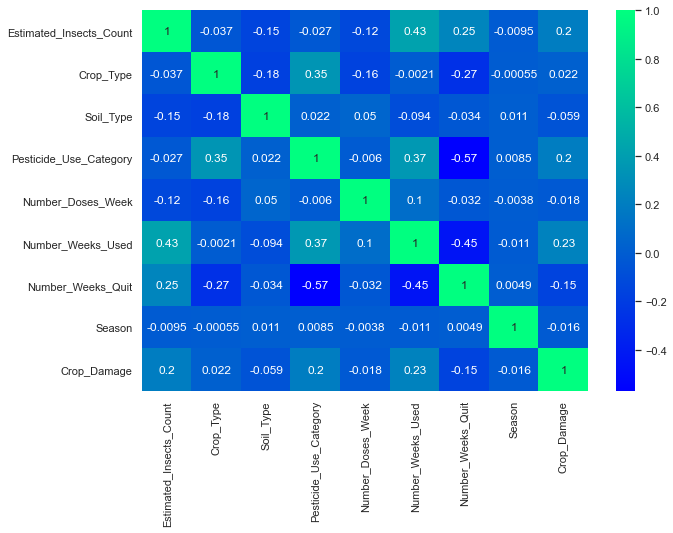

In [30]:
plt.figure(figsize=(10,7))
sns.heatmap(cor,annot=True,cmap="winter")

1. Most positive Correaltions : Number_Weeks_Used > Pesticide_Use_Category > Estimated_Insect_Count
2. Most negative Correaltions : Number_Weeks_Out < Number_Doses_Week < Soil_Type
3. Any of the variable is not showing exceptional positive and negative correaltion but are within prescribed limits. 

# Plotting Outliers

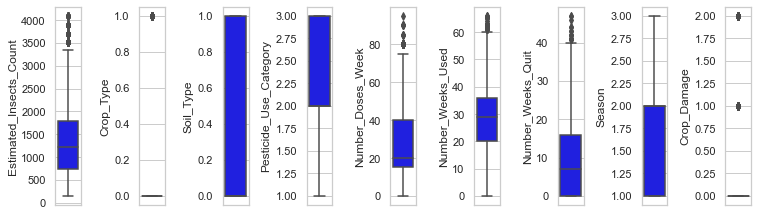

In [31]:
collist=df.columns.values
ncol=17
nrow=10
plt.figure(figsize=(20,30))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(df[collist[i]],color="blue",orient="v")
    plt.tight_layout()

We can observe lot of outliers in the Estimated Insects Count and Number of doses per week.But we will not be removing any outlier as it is neccessary for the analysis.

# Removing Skewness

In [32]:
#Spliitng the data and target variable
df_x=df.drop(['Crop_Damage'],axis=1)
y=df['Crop_Damage']

In [33]:
df_x.skew()

Estimated_Insects_Count    0.911469
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.678586
Number_Doses_Week          0.945895
Number_Weeks_Used          0.278664
Number_Weeks_Quit          0.919771
Season                     0.144841
dtype: float64

Most of them are within the ranges Crop type looks a bit skewed.

In [34]:
#Treating skewness via log method
for col in df_x.columns:
    if df_x[col].skew()>0.7:
        df_x[col]=np.log1p(df_x[col])

# Scaling the Data

In [35]:
#Scaling the input variable
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

As our data target variable is categorical there we will be using classification techniques.

# Model Training

We will not be using Logistic Regression as categorical variable is greater than 2.

In [36]:
#Coverting to train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [37]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [38]:
models= [SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),GaussianNB()]
for m in models:
    m.fit(x_train,y_train)
    print("Score of ",m," :",m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Scores')
    print("Accuracy Score : ",accuracy_score(y_test,predm))     
    print("--------------------------------------------------------------------------------------------")
    print("\n")

Score of  SVC()  : 0.8382712693666757
Scores
Accuracy Score :  0.8304347826086956
--------------------------------------------------------------------------------------------


Score of  DecisionTreeClassifier()  : 0.9978254960587116
Scores
Accuracy Score :  0.7597826086956522
--------------------------------------------------------------------------------------------


Score of  KNeighborsClassifier()  : 0.8518619189997282
Scores
Accuracy Score :  0.8326086956521739
--------------------------------------------------------------------------------------------


Score of  GaussianNB()  : 0.8018483283500951
Scores
Accuracy Score :  0.8195652173913044
--------------------------------------------------------------------------------------------




As of now, Decision Tree Classifier is giving best results with a score of 99% but we will cross validate it.

In [39]:
#Cross Validating
models= [SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),GaussianNB()]
for m in models:
    score=cross_val_score(m,x,y,cv=4,scoring="accuracy")
    print("Score of ",m," is :",score)
    print("Mean Score : ",score.mean())
    print("Standard Deviation : ",score.std())
    print("--------------------------------------------------------------------------------------------")
    print("\n")

Score of  SVC()  is : [0.83826087 0.83043478 0.79826087 0.83115753]
Mean Score :  0.8245285125061491
Standard Deviation :  0.015470896651428178
--------------------------------------------------------------------------------------------


Score of  DecisionTreeClassifier()  is : [0.6826087  0.70695652 0.70434783 0.72497824]
Mean Score :  0.7047228213569455
Standard Deviation :  0.015037009825082194
--------------------------------------------------------------------------------------------


Score of  KNeighborsClassifier()  is : [0.79304348 0.82695652 0.7826087  0.81636205]
Mean Score :  0.8047426874030348
Standard Deviation :  0.017714748096396376
--------------------------------------------------------------------------------------------


Score of  GaussianNB()  is : [0.70347826 0.84173913 0.60608696 0.83724978]
Mean Score :  0.7471385325613956
Standard Deviation :  0.09857874631033123
--------------------------------------------------------------------------------------------




By Cross Validating we came to know that Support Vector Classifier will be best for our dataset. 

In [41]:
#Support Vector Classifier is the best model so we will find out it's best parameter using GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(x_train, y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.833, total=   0.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.833, total=   0.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.833, total=   0.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.832, total=   0.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.833, total=   0.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.833, total=   0.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.833, total=   0.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.833, total=   0.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.832, total=   0.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  5.8min finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [42]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=10, gamma=0.01)


We get best results for Support Vector Classifier when c = 10 and gamma = 0.01 and kernel = rbf.

In [45]:
#Using Support Vector method with best parameters
svc=SVC(C= 10, gamma= 0.01, kernel= 'rbf')
svc.fit(x_train,y_train)
print("Score of ",svc," :",svc.score(x_train,y_train))
predsvc=svc.predict(x_test)
print('Scores')
print("Accuracy Score : ",accuracy_score(y_test,predsvc))
print("Classification Report : \n",classification_report(y_test,predsvc))
print("Confusion_matrix : ",confusion_matrix(y_test,predsvc))
print("--------------------------------------------------------------------------------------------")
print("\n")

Score of  SVC(C=10, gamma=0.01)  : 0.8377276433813536
Scores
Accuracy Score :  0.8304347826086956
Classification Report : 
               precision    recall  f1-score   support

           0       0.83      1.00      0.91       757
           1       0.80      0.06      0.11       140
           2       0.00      0.00      0.00        23

    accuracy                           0.83       920
   macro avg       0.54      0.35      0.34       920
weighted avg       0.81      0.83      0.76       920

Confusion_matrix :  [[756   1   0]
 [132   8   0]
 [ 22   1   0]]
--------------------------------------------------------------------------------------------




We are getting an accuracy of 83% using Support Vector Classifier but we will try to boost the score by using ensemble techniques.

In [46]:
#Random Forest
rf=RandomForestClassifier(n_estimators=20,random_state=0)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print('Scores')
print("Accuracy Score : ",accuracy_score(y_test,predrf))
print("Classification Report : \n",classification_report(y_test,predrf))
print("Confusion_matrix : ",confusion_matrix(y_test,predrf))
print("--------------------------------------------------------------------------------------------")
print("\n")

Scores
Accuracy Score :  0.8282608695652174
Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.97      0.91       757
           1       0.49      0.19      0.27       140
           2       0.00      0.00      0.00        23

    accuracy                           0.83       920
   macro avg       0.45      0.39      0.39       920
weighted avg       0.77      0.83      0.79       920

Confusion_matrix :  [[736  20   1]
 [114  26   0]
 [ 16   7   0]]
--------------------------------------------------------------------------------------------




In [47]:
#ADABoost Classifier
ad=AdaBoostClassifier(n_estimators=20,random_state=0)
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print('Scores')
print("Accuracy Score : ",accuracy_score(y_test,predad))
print("Classification Report : \n",classification_report(y_test,predad))
print("Confusion_matrix : ",confusion_matrix(y_test,predad))
print("--------------------------------------------------------------------------------------------")
print("\n")

Scores
Accuracy Score :  0.8282608695652174
Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.99      0.91       757
           1       0.56      0.07      0.13       140
           2       0.00      0.00      0.00        23

    accuracy                           0.83       920
   macro avg       0.46      0.35      0.34       920
weighted avg       0.77      0.83      0.77       920

Confusion_matrix :  [[752   5   0]
 [130  10   0]
 [ 20   3   0]]
--------------------------------------------------------------------------------------------




This shows that the accuracy score remains best when we are using Support Vector Classifier model.

# Best Model For Prediction : Logistic Regression

# Saving the Model

In [51]:
import pickle
filename= "agri.pkl"
pickle.dump(svc,open(filename,'wb'))

# Using the test dataset

In [53]:
test_df=pd.read_csv("C:\\Users\\DELL\Downloads\\test_agriculture.csv")
test_df.head(10)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1
5,F00000015,851,0,1,1,0,0.0,0,2
6,F00000016,851,1,0,1,0,NaN,0,3
7,F00000019,1056,1,0,1,0,0.0,0,1
8,F00000025,1576,1,0,1,0,0.0,0,2
9,F00000026,1576,1,0,1,0,0.0,0,1


In [55]:
test_df.shape

(1199, 9)

In [56]:
test_df.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

In [57]:
#We will be filling null values by mean.
test_df["Number_Weeks_Used"].fillna(test_df["Number_Weeks_Used"].mean(),inplace=True)

In [61]:
test_df.drop(['ID'],axis=1,inplace=True)

In [62]:
#Load the model
fitted_model=pickle.load(open("agri.pkl","rb"))

In [63]:
fitted_model

SVC(C=10, gamma=0.01)

In [64]:
#Prediction over Test data
predictions=fitted_model.predict(test_df)

In [65]:
predictions

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)